# Notebook ICD - 10

Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax

Load the dataset and separate input and Target variables

In [2]:
data = pd.read_csv('data_for_lr.csv')
 
# Drop the missing values
data = data.dropna()
 
# training dataset and labels
train_input = np.array(data.x[0:500]).reshape(500,1)
train_output  = np.array(data.y[0:500]).reshape(500,1)
 
# valid dataset and labels
test_input = np.array(data.x[500:700]).reshape(199,1)
test_output  = np.array(data.y[500:700]).reshape(199,1)

Build the Linear Regression Model

In [3]:
class LinearRegression:
	def __init__(self):
		self.parameters = {}
	
	def forward_propagation(self, train_input):
		m = self.parameters['m']
		c = self.parameters['c']
		predictions = np.multiply(m, train_input) + c
		return predictions

	def cost_function(self, predictions, train_output):
		cost = np.mean((train_output - predictions) ** 2)
		return cost

	def backward_propagation(self, train_input, train_output, predictions):
		derivatives = {}
		df = (train_output - predictions) * -1
		dm = np.mean(np.multiply(train_input, df))
		dc = np.mean(df)
		derivatives['dm'] = dm
		derivatives['dc'] = dc
		return derivatives

	def update_parameters(self, derivatives, learning_rate):
		self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
		self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

	def train(self, train_input, train_output, learning_rate, iters):
		#initialize random parameters
		self.parameters['m'] = np.random.uniform(0,1) * -1
		self.parameters['c'] = np.random.uniform(0,1) * -1
		
		#initialize loss
		self.loss = []
		
		#iterate
		for i in range(iters):
			#forward propagation
			predictions = self.forward_propagation(train_input)

			#cost function
			cost = self.cost_function(predictions, train_output)

			#append loss and print
			self.loss.append(cost)
			print("Iteration = {}, Loss = {}".format(i+1, cost))

			#back propagation
			derivatives = self.backward_propagation(train_input, train_output, predictions)

			#update parameters
			self.update_parameters(derivatives, learning_rate)

		return self.parameters, self.loss

Train the model

In [4]:
#Example usage
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)

Iteration = 1, Loss = 8281.83704260729
Iteration = 2, Loss = 3761.7511823561167
Iteration = 3, Loss = 1710.9832209221438
Iteration = 4, Loss = 780.5475252998114
Iteration = 5, Loss = 358.40781960241094
Iteration = 6, Loss = 166.88256754354015
Iteration = 7, Loss = 79.98734853854353
Iteration = 8, Loss = 40.56289142262701
Iteration = 9, Loss = 22.675971556358547
Iteration = 10, Loss = 14.560656196119554
Iteration = 11, Loss = 10.878728623698295
Iteration = 12, Loss = 9.20823400121321
Iteration = 13, Loss = 8.450328736060413
Iteration = 14, Loss = 8.106466273151097
Iteration = 15, Loss = 7.950455488230749
Iteration = 16, Loss = 7.879673217686493
Iteration = 17, Loss = 7.847559218517519
Iteration = 18, Loss = 7.832989056902313
Iteration = 19, Loss = 7.826378553817761
Iteration = 20, Loss = 7.823379356625247


Final Prediction and Plot the regression line

In [5]:
#Prediction on test data
print(parameters['m'])
print(parameters['c'])
y_pred = test_input*parameters['m'] + parameters['c']

1.000020078408839
-0.21022678282173043


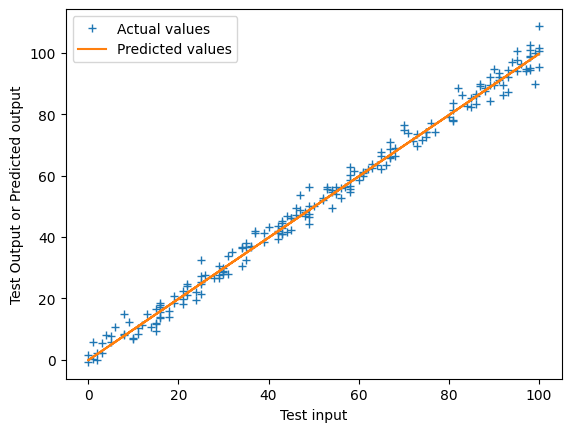

In [6]:
# Plot the regression line with actual data pointa
plt.plot(test_input, test_output, '+', label='Actual values')
plt.plot(test_input, y_pred, label='Predicted values')
plt.xlabel('Test input')
plt.ylabel('Test Output or Predicted output')
plt.legend()
plt.show()

## Using Sklearn

In [7]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_input, train_output)
print(reg.score(train_input, train_output))

0.9905959656215136


In [8]:
#Prediction on test data
print(reg.coef_)
print(reg.intercept_)
y_pred = reg.predict(test_input)

[[1.0009993]]
[-0.23603461]


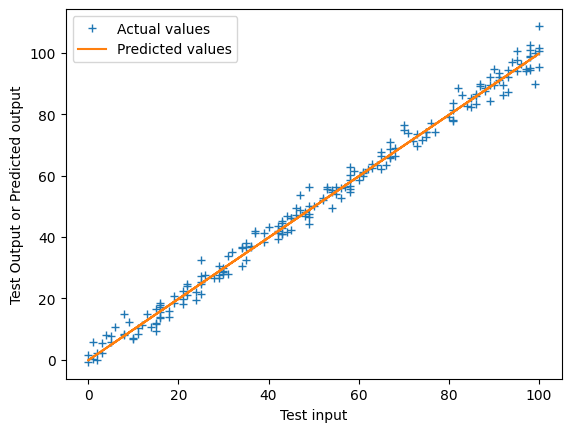

In [9]:
# Plot the regression line with actual data pointa
plt.plot(test_input, test_output, '+', label='Actual values')
plt.plot(test_input, y_pred, label='Predicted values')
plt.xlabel('Test input')
plt.ylabel('Test Output or Predicted output')
plt.legend()
plt.show()